# WeRateDogs 项目

## 收集观察数据

### 这个项目已经给定的数据有以下两个：
- 推特档案 twitter_archive_enhanced.csv
- 附加数据 tweet_json.txt 

### 需要编程收集的数据有一个：
- 图像预测 image_predictions.tsv

In [1]:
# 导入本项目需要用到的库
import pandas as pd
import numpy as np
import requests
import json

In [2]:
# 读取 twitter_archive_enhanced.csv
df_archive = pd.read_csv('twitter_archive_enhanced.csv')

- 观察 df_archive

In [3]:
df_archive.info()
df_archive.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [4]:
# 下载 image_predictions.tsv
r= requests.get("https://raw.githubusercontent.com/udacity/new-dand-advanced-china/master/%E6%95%B0%E6%8D%AE%E6%B8%85%E6%B4%97/WeRateDogs%E9%A1%B9%E7%9B%AE/image-predictions.tsv")
with open("image_predictions.tsv", "wb") as tsv:
    tsv.write(r.content)
tsv.close()

In [5]:
# 读取 image_predictions.tsv
df_image = pd.read_csv('image_predictions.tsv', sep='\t')

- 观察 df_image

In [6]:
df_image.info()
df_image.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True


In [7]:
# 结合项目要求只需要读取 tweet_json.txt 里部分的数据
tweet_list = []
with open('tweet_json.txt','r') as f:
    for row in f:
        json_dict = json.loads(row)
        to_append = {
            'tweet_id':json_dict['id'],
            'retweet_count':json_dict['retweet_count'],
            'favorite_count':json_dict['favorite_count']
        }
        tweet_list.append(to_append)        
df_json = pd.DataFrame(tweet_list, columns=['tweet_id','retweet_count','favorite_count'])     

- 观察 df_json

In [8]:
df_json.info()
df_json.head(1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2352 entries, 0 to 2351
Data columns (total 3 columns):
tweet_id          2352 non-null int64
retweet_count     2352 non-null int64
favorite_count    2352 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8842,39492


## 评估

In [9]:
# 保存数据方便在电子表格查看
df_archive_clean = df_archive.copy()
df_image_clean = df_image.copy()
df_json_clean = df_json.copy()

df_archive_clean.to_csv('df_archive_clean.csv', index=False)
df_image_clean.to_csv('df_image_clean.csv', index=False)
df_json_clean.to_csv('df_json_clean.csv', index=False)

### 数据质量问题

1. df_archive_clean 含有属于转发的推文条目
2. df_archive_clean 存在没有图片的推文条目
3. ID 应为字符串而不是整数，in_reply_to_status_id, in_reply_to_user_id 的数据量太少去掉
4. 时间戳的数据类型应为 datatime 非对象
5. 修改分子为浮点数
6. 分母不为10的评级为异常值，可以个别修改，但是其总数并不大所以可以去掉
7. 分子大于等于24的也多为异常值，结合分母的异常值一起去掉后，高效且不会影响整体分析因为异常值少
8. name 中的 None, a, an, the 不是 non-null

### 数据清洁度问题

1. 这三个数据集应该基于相同的 ID 进行合并
2. doggo, floofer, pupper, puppo 应该合并为一列

## 清理

> ### ___定义___ 
删除 retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp 为 non-null 所在行的数据后再删掉其列

### ___代码___

In [10]:
df_archive_clean = df_archive_clean[df_archive_clean.retweeted_status_id.isnull()]
df_archive_clean.to_csv('df_archive_clean.csv', index=False)
df_archive_clean = pd.read_csv('df_archive_clean.csv')

df_archive_clean.drop(
    ['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1,inplace=True
)

### ___测试___

In [11]:
df_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2175 entries, 0 to 2174
Data columns (total 14 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_numerator         2175 non-null int64
rating_denominator       2175 non-null int64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(3), object(9)
memory usage: 238.0+ KB


> ### ___定义___
使用 merge 的 inner 方法合并三个数据集，求交集去掉不含图片的条目

### ___代码___

In [12]:
twitter_archive_master = pd.merge(df_image_clean, df_json_clean, how='inner')
twitter_archive_master = pd.merge(twitter_archive_master, df_archive_clean)

### ___测试___

In [13]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 27 columns):
tweet_id                 1994 non-null int64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null object
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null object
p2_conf                  1994 non-null float64
p2_dog                   1994 non-null bool
p3                       1994 non-null object
p3_conf                  1994 non-null float64
p3_dog                   1994 non-null bool
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            199

> ### ___定义___
把 tweet_id 的数据类型修改为字符串，in_reply_to_status_id, in_reply_to_user_id 的数据太少了去掉

### ___代码___

In [14]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.apply(str)

twitter_archive_master.drop(['in_reply_to_status_id'], axis=1, inplace=True)
twitter_archive_master.drop(['in_reply_to_user_id'], axis=1, inplace=True)

### ___测试___

In [15]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null objec

> ### ___定义___
把 timestamp 的类型改为 datatime

### ___代码___

In [16]:
twitter_archive_master.timestamp = pd.to_datetime(twitter_archive_master.timestamp)

###  ___测试___

In [17]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-nu

> ### ___定义___
修改 ratiting_numerator 为浮点数

### ___代码___

In [18]:
twitter_archive_master.rating_numerator = twitter_archive_master.rating_numerator.apply(float)

### ___测试___

In [19]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1994 non-null object
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null bool
p3                    1994 non-null object
p3_conf               1994 non-null float64
p3_dog                1994 non-null bool
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
timestamp             1994 non-null datetime64[ns]
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null int64
name                  1994 non-

> ### ___定义___
删除所有分母不为10的异常值

### ___代码___

In [20]:
twitter_archive_master.query('rating_denominator == 10', inplace=True)

### ___测试___

In [21]:
twitter_archive_master.rating_denominator.describe()

count    1976.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

> ### ___定义___
删除所有分子大于等于24的异常值

### ___代码___

In [22]:
twitter_archive_master.query('rating_numerator < 24', inplace=True)

### ___测试___

In [23]:
twitter_archive_master.rating_numerator.describe()

count    1971.000000
mean       10.548960
std         2.185325
min         0.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

> ### ___定义___
把 name 中的 None, a, an, the 标记为空值

### ___代码___

In [24]:
twitter_archive_master['name'].replace('a', np.nan, inplace=True)
twitter_archive_master['name'].replace('an', np.nan, inplace=True)
twitter_archive_master['name'].replace('the', np.nan, inplace=True)
twitter_archive_master['name'].replace('None', np.nan, inplace=True)

### ___测试___

In [25]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 25 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1373 non-

> ### ___定义___
doggo, floofer, pupper, puppo 合并为一列

### ___代码___

In [26]:
# 将原始四列狗狗地位的 None 替换为空值
twitter_archive_master['doggo'].replace('None', '', inplace=True)
twitter_archive_master['floofer'].replace('None', '', inplace=True)
twitter_archive_master['pupper'].replace('None', '', inplace=True)
twitter_archive_master['puppo'].replace('None', '', inplace=True)

# 把以上四列合并为新的狗狗地位列 status 
twitter_archive_master['status'] = \
twitter_archive_master['doggo'] + twitter_archive_master['floofer'] + \
twitter_archive_master['pupper'] + twitter_archive_master['puppo']

# 把 status 列的空值替换为 np.nan
twitter_archive_master['status'].replace('', np.nan, inplace=True)

# 修改一个狗狗有多个地位名字的格式
twitter_archive_master['status'].replace('doggopupper', 'doggo, pupper', inplace=True)
twitter_archive_master['status'].replace('doggofloofer', 'doggo, floofer', inplace=True)
twitter_archive_master['status'].replace('doggopuppo', 'doggo, puppo', inplace=True)

# 去掉原始的狗狗地位的列
twitter_archive_master.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

### ___测试___

In [27]:
twitter_archive_master.info()
twitter_archive_master['status'].value_counts()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1971 entries, 0 to 1993
Data columns (total 22 columns):
tweet_id              1971 non-null object
jpg_url               1971 non-null object
img_num               1971 non-null int64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null bool
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null bool
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null bool
retweet_count         1971 non-null int64
favorite_count        1971 non-null int64
timestamp             1971 non-null datetime64[ns]
source                1971 non-null object
text                  1971 non-null object
expanded_urls         1971 non-null object
rating_numerator      1971 non-null float64
rating_denominator    1971 non-null int64
name                  1373 non-

pupper            202
doggo              63
puppo              22
doggo, pupper       9
floofer             7
doggo, floofer      1
doggo, puppo        1
Name: status, dtype: int64

## 保存清理后的数据

In [28]:
twitter_archive_master.to_csv('twitter_archive_master.csv')

## 分析

In [29]:
# 导入可视化库
import matplotlib.pyplot as plt
%matplotlib inline

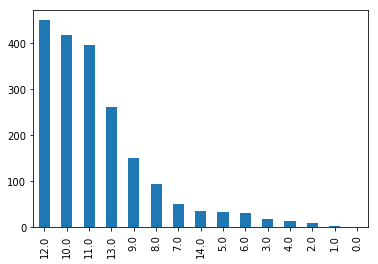

In [30]:
# 对分子做频率可视化统计
twitter_archive_master['rating_numerator'].value_counts().plot.bar()
plt.show()

- 由图示看到评分频次最高是前三个分子数值分别是：12、10、11

In [31]:
# 统计预测图像可信度最高的图片的名字
twitter_archive_master['p1'].value_counts()

golden_retriever             135
Labrador_retriever            92
Pembroke                      88
Chihuahua                     79
pug                           54
chow                          41
Samoyed                       40
toy_poodle                    38
Pomeranian                    37
malamute                      29
cocker_spaniel                27
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            22
seat_belt                     21
German_shepherd               20
Staffordshire_bullterrier     19
Siberian_husky                19
Shetland_sheepdog             18
Eskimo_dog                    18
beagle                        17
Rottweiler                    17
Maltese_dog                   17
Cardigan                      17
Shih-Tzu                      17
teddy                         17
Italian_greyhound             16
Lakeland_terrier              16
kuvasz                        15
web_site                      15
          

- 参与调查的宠物狗中数量排名前三的是：golden_retriever、Labrador_retriever、Pembroke

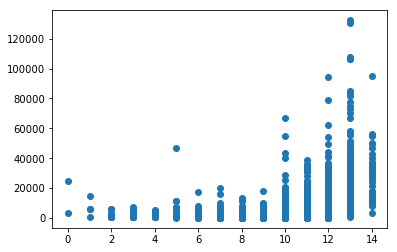

In [32]:
# 对喜爱数和分子关系做可视化分析
plt.scatter(twitter_archive_master.rating_numerator, twitter_archive_master.favorite_count)

- 随着评分的增加，喜欢数有增加的趋势

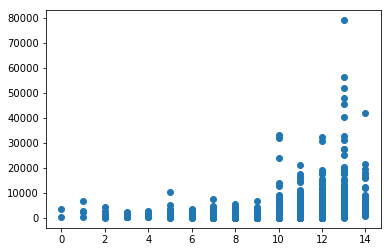

In [33]:
# 对转发数和分子关系做可视化分析
plt.scatter(twitter_archive_master.rating_numerator, twitter_archive_master.retweet_count)

- 同样看到：随着评分的增加，转发数有增加的趋势